# Machine learning summative assessment - Airline Avionics

## Task 1 Import and clean data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


#styling
plt.rc("font", size = 14)      #for customization just like .vimrc
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%matplotlib inline
# Add some plotting config
#plt.rcParams['figure.figsize'] = (12.0, 4.0)
#plt.rcParams['image.interpolation'] = 'nearest'

In [3]:
#reading data on to our notebook
data = pd.read_csv('ml_summative_raw.csv', sep=',')

In [4]:
data.head(5)

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


In [5]:
#size of our data
data.shape

(75130, 50)

In [6]:
#number of missing values in each and every column
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                     65504
Spin-Up Time                                                                                   2
Start/Stop Count                                                                               2
Reallocated Sectors Count                                                                      2
Seek Error Rate               

In [7]:
#I'm filling all the missing data with the mean 
data = data.fillna(data.mean())

In [8]:
#number of missing values in each and every column
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                         0
Spin-Up Time                                                                                   0
Start/Stop Count                                                                               0
Reallocated Sectors Count                                                                      0
Seek Error Rate               

In [9]:
#Dropping non-numeric columns
data = data.dropna(axis='columns')
#data.drop('Unnamed: 0', 'date', 'serial_number', 'model', axis='columns', inplace=True)
data.drop('Unnamed: 0', axis='columns', inplace=True)
data.drop('date', axis='columns', inplace=True)
data.drop('serial_number', axis='columns', inplace=True)
data.drop('model', axis='columns', inplace=True)

data.isnull().sum()

capacity_bytes                                                                             0
failure                                                                                    0
Throughput Performance                                                                     0
Spin-Up Time                                                                               0
Start/Stop Count                                                                           0
Reallocated Sectors Count                                                                  0
Seek Error Rate                                                                            0
Seek Time Performance                                                                      0
Power-On Hours                                                                             0
Spin Retry Count                                                                           0
Recalibration Retriesor Calibration Retry Count                       

### <font color=#9846fc>No more missing values as we can see above</font>

## Task 2 Inspect and visualize the data

In [10]:
#understand the structure of the data by first getting the descriptive stats
data.describe()

,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
count,7.513000e+04,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,...,75130.000000,75130.0,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000
mean,3.666340e+12,0.018594,130.084563,102.174835,99.985611,109.128061,93.192498,120.649283,83.165451,101.145192,...,80.714789,100.0,99.950238,100.099998,100.099998,1.027747,1.554933,9.074271,101.554268,118.856254
std,1.423955e+12,0.135089,12.265414,21.576988,0.481049,31.055106,26.428754,12.486162,13.571579,13.167474,...,0.828246,0.0,0.993018,2.800947,2.800947,0.361136,1.610741,5.904779,2.780486,28.290474
min,-1.000000e+00,0.000000,100.000000,85.000000,83.000000,1.000000,26.000000,11.000000,1.000000,95.000000,...,56.000000,100.0,71.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,15.275819
25%,4.000787e+12,0.000000,130.084563,92.000000,100.000000,100.000000,84.000000,120.649283,74.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,111.000000
50%,4.000787e+12,0.000000,130.084563,95.000000,100.000000,100.000000,87.000000,120.649283,85.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,116.000000
75%,4.000787e+12,0.000000,130.084563,98.000000,100.000000,100.000000,90.000000,120.649283,94.000000,100.000000,...,80.714789,100.0,100.000000,100.000000,100.000000,1.027747,1.554933,9.074271,101.554268,118.000000
max,8.001563e+12,1.000000,252.000000,253.000000,100.000000,252.000000,252.000000,252.000000,100.000000,252.000000,...,98.000000,100.0,100.000000,200.000000,200.000000,100.000000,100.000000,100.000000,200.000000,200.000000


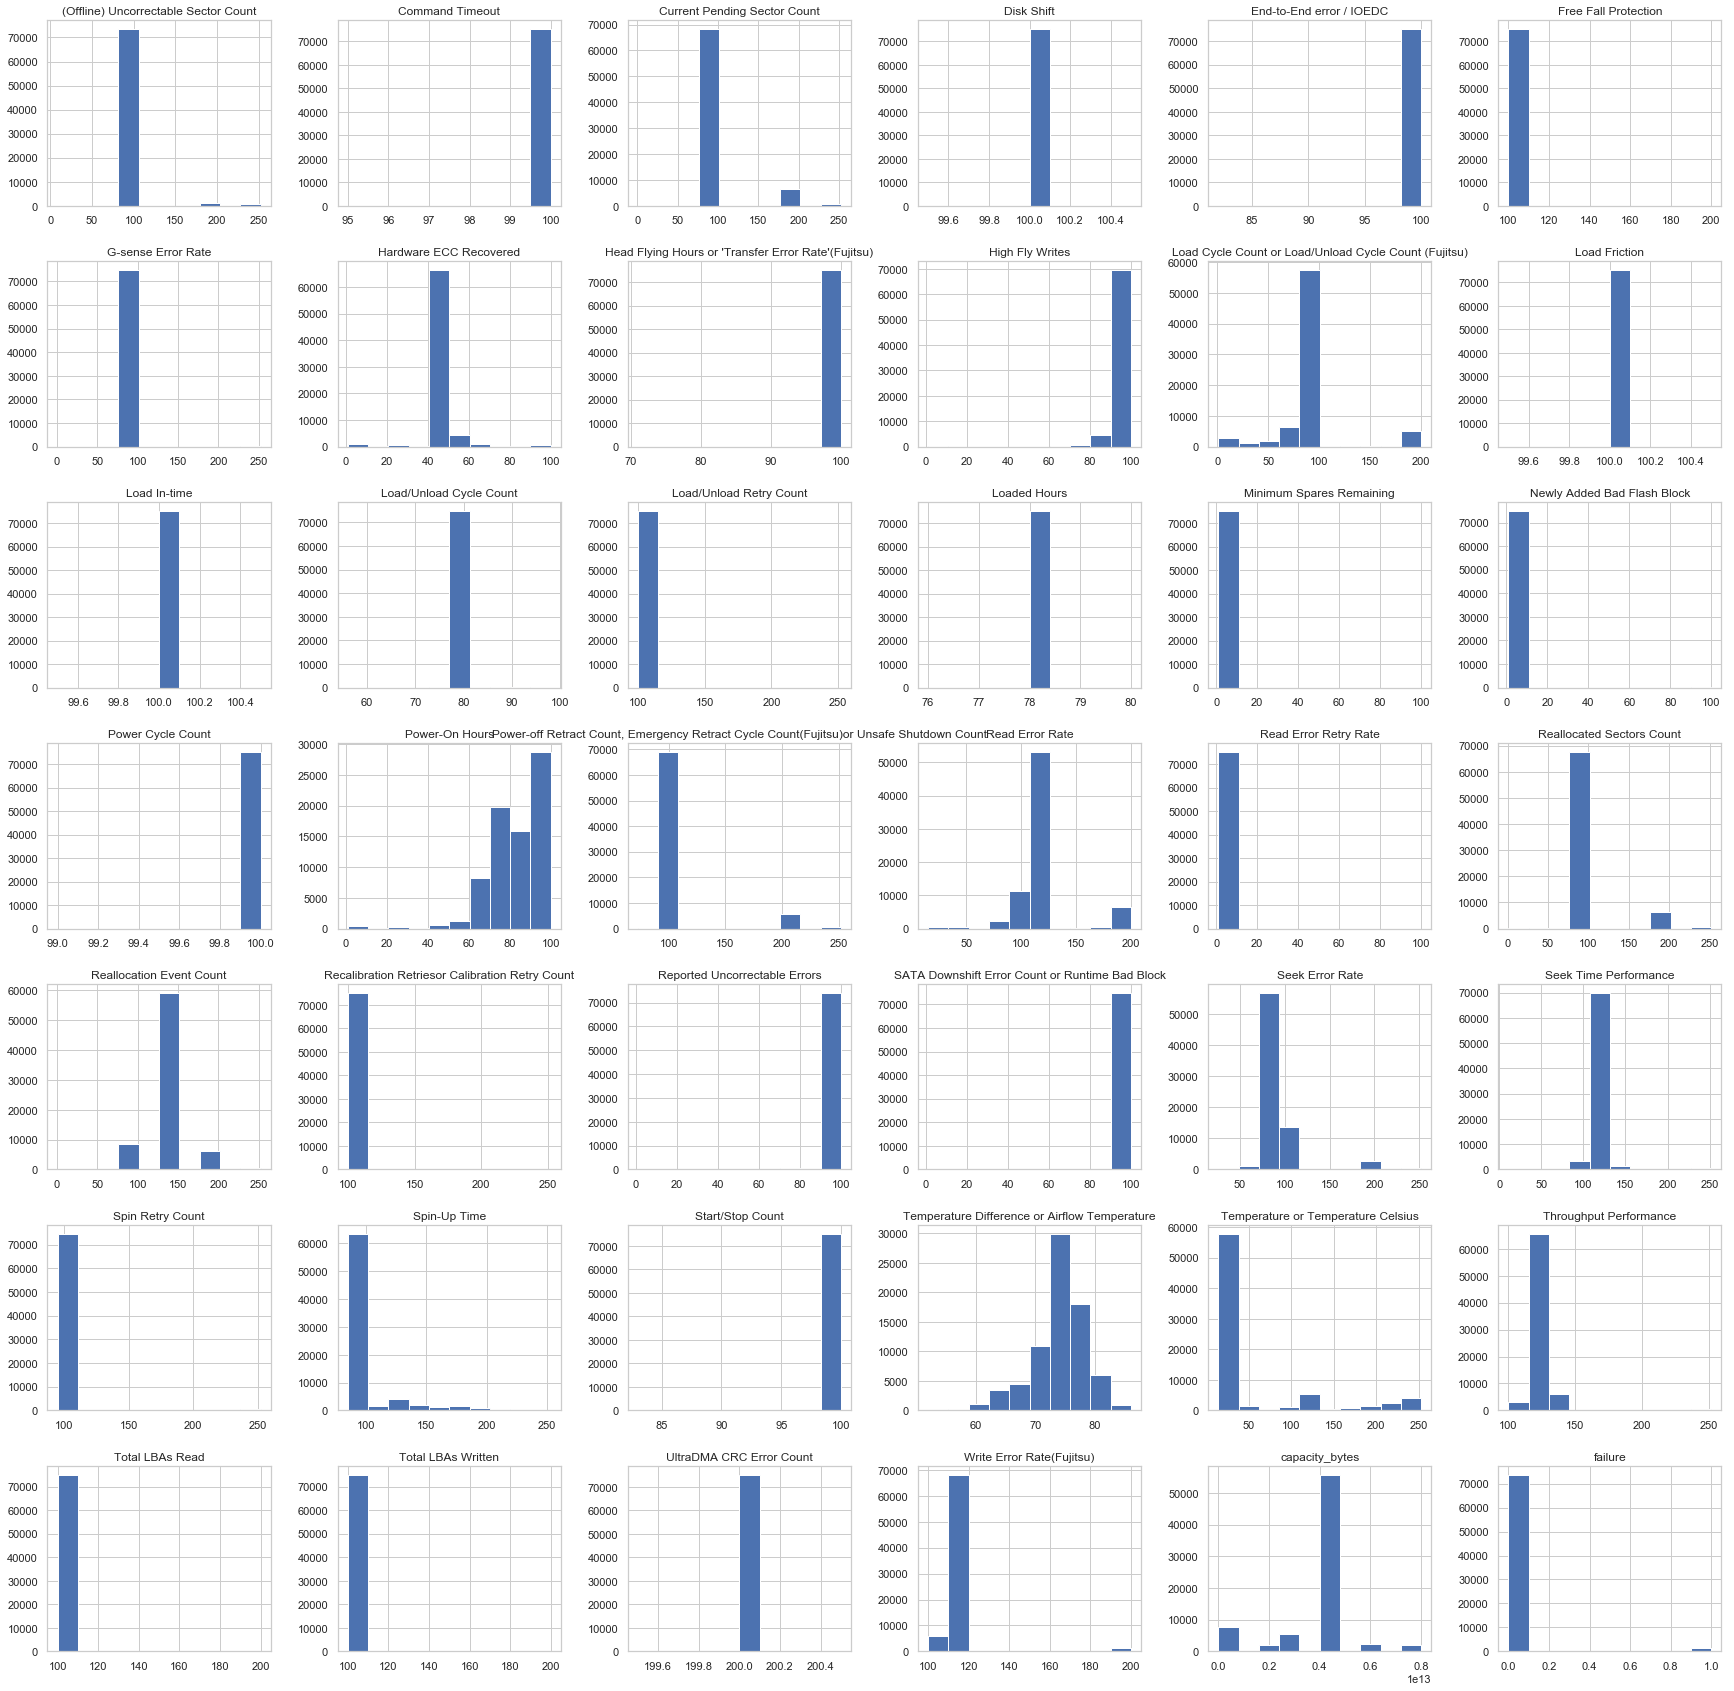

In [11]:
#visualization of the features to see how the data is distributed.
data.hist(figsize=(30,30));

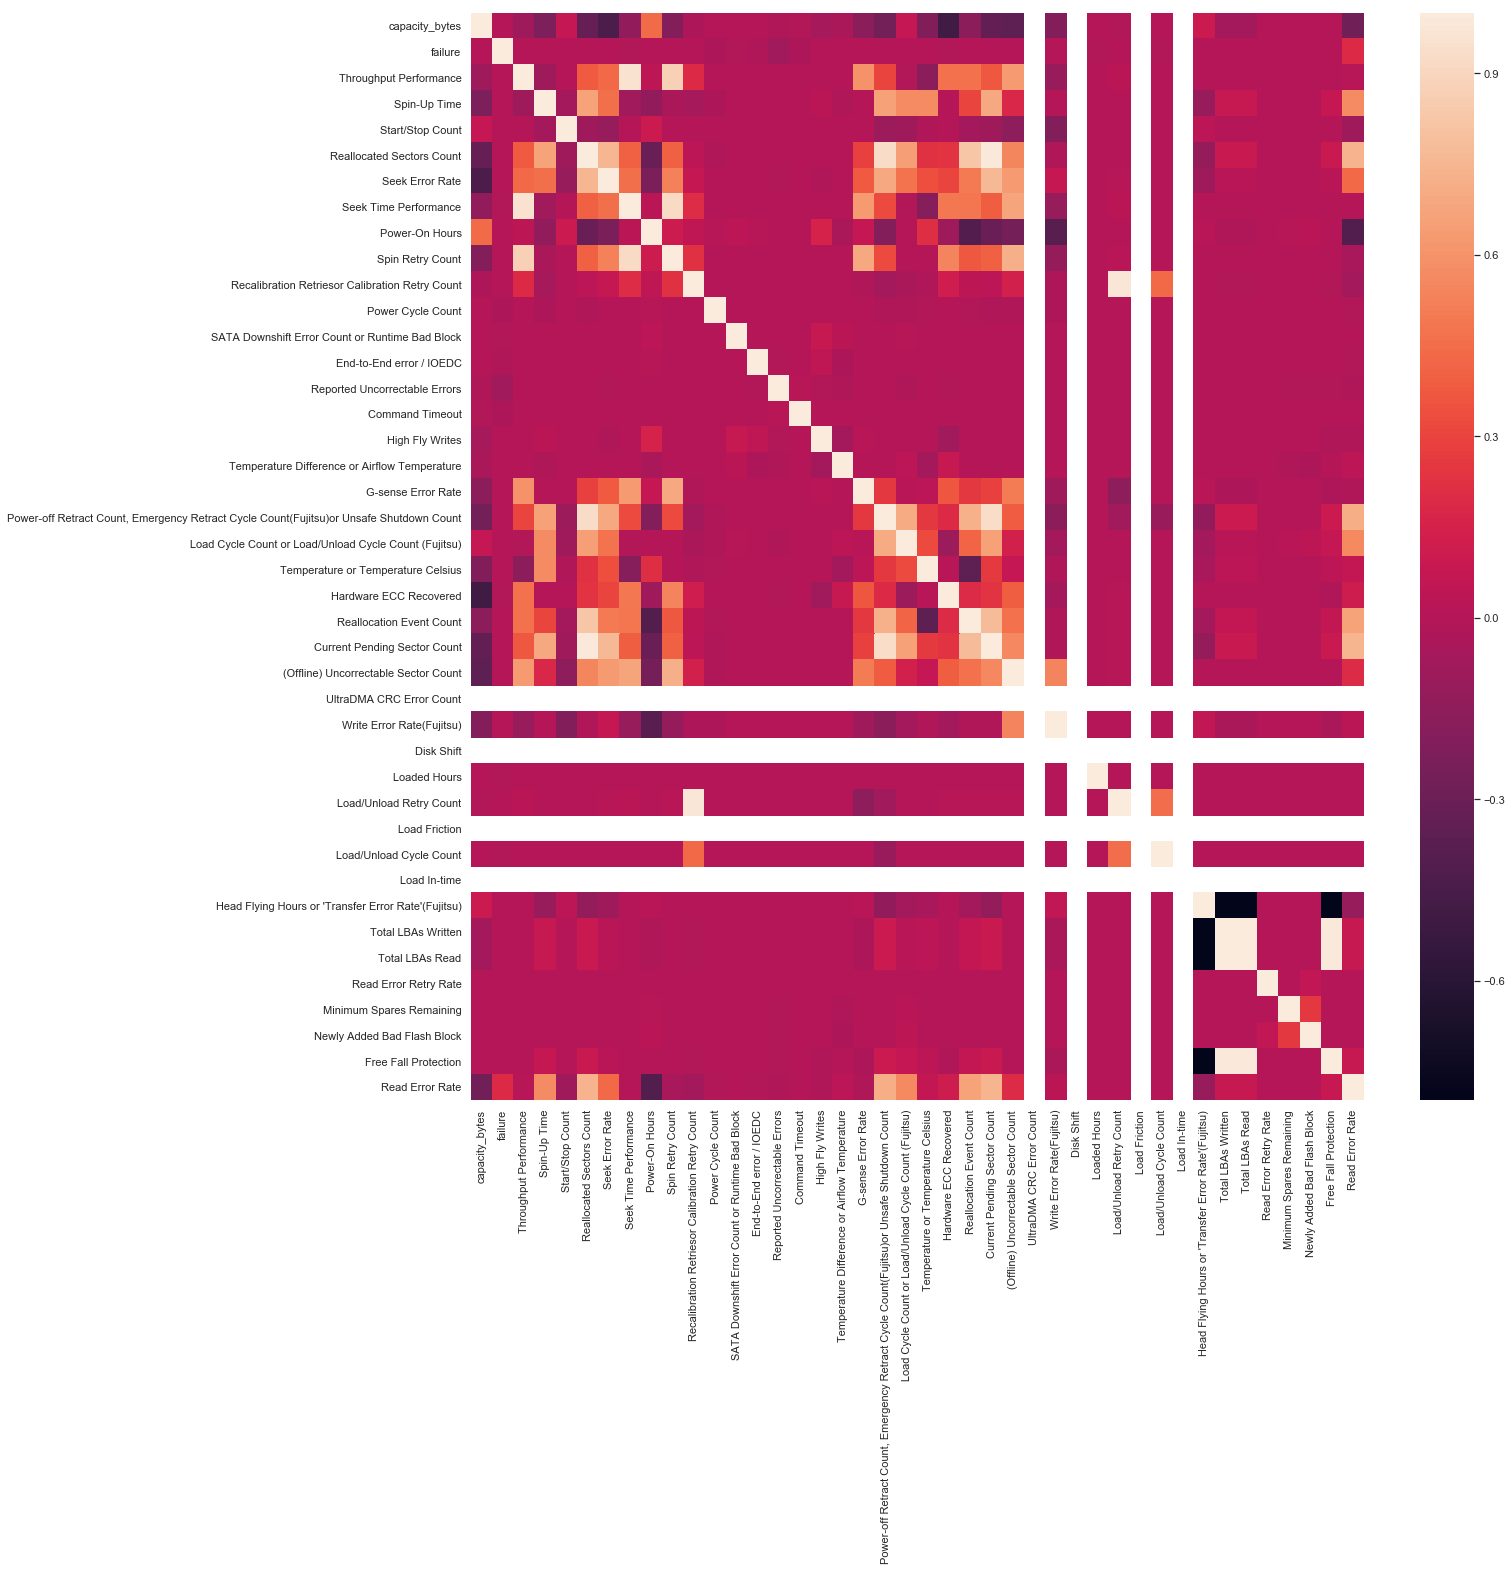

In [12]:
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### <font color=#9846fc>We can see capacity bytes has strong positive correlation as seen on the above correlation matrix</font>

In [13]:
#scatter_matrix(data,figsize=(15, 15))
#plt.show()

## Task 3 Feature engineering

In [14]:
#show how the Hard Disks perform in terms of failing or working fine, 
#see bellow that we have less failures('1') than OK('0') 
data.groupby('failure').size()

failure
0    73733
1     1397
dtype: int64

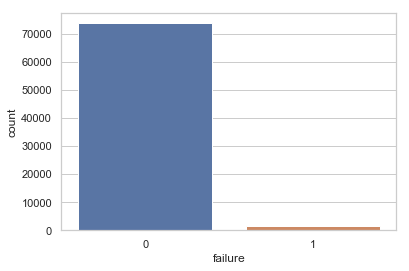

In [15]:
#Visualizing the failure status, the status is binary classification
sns.countplot(x='failure',data=data)

In [16]:
#I'll use recursive feature elimination to determine the features that are important for predicting
df = data.drop(['failure'], axis = 1)
X = df.values # X isindependent the variable
y = data['failure'].values # Y is the dependent variable

In [17]:
logreg = LogisticRegression()

selector = RFE(logreg) # defaults to half the features
selector = selector.fit(X, y)
print(selector.ranking_, '\n')
print(selector.support_)

[ 1  1  1  9  1  1  1 18  1  1  4 11  8  2  3 12 16  1  1 13 17 19  1  1
  1  1  1  7 15  1  5 14  6 10  1  1 22 21 20  1  1] 

[ True  True  True False  True  True  True False  True  True False False
 False False False False False  True  True False False False  True  True
  True  True  True False False  True False False False False  True  True
 False False False  True  True]


### <font color=#9846fc>I will do another RFE as we can see above I still need to eliminate the false features</font>

In [18]:
features = [0,3,7,10,11,12,13,14,15,16,19,20,21,27,28,30,31,32,33]
df = df.drop(df.columns[features], axis=1)
X = df.values
selector = RFE(logreg) # defaults to half the features
selector = selector.fit(X, y)
print(selector.ranking_, '\n')
print(selector.support_)

[ 4 11 10 12  5  1  1  1  8  1  1  1  1  1  1  6  2  7  1  9  3  1] 

[False False False False False  True  True  True False  True  True  True
  True  True  True False False False  True False False  True]


## Task 4 Model fitting

In [19]:
#Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
logreg = LogisticRegression();
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Task 5 Model evaluation

In [21]:
y_pred = logreg.predict(X_test)
modscr = logreg.score(X_test, y_test)
print('score is',  round(modscr, 2))

score is 0.99


## Task 6 Produce recommendations

In [22]:
#Read data to my dataframe
dataPred = pd.read_csv('ml_summative_predict.csv', sep=';')

In [23]:
dataPred.shape

(173, 49)

In [24]:
#df.shape

In [25]:
#adding new data to my d
#df = df.append(dataPred)
#df.shape

In [26]:
#Replace Drive with new drives
df = dataPred
df.shape

(173, 49)

In [27]:
#check missing values from new drives
df.isnull().sum()

Unnamed: 0                                                                                   0
date                                                                                         0
serial_number                                                                                0
model                                                                                        0
capacity_bytes                                                                               0
Throughput Performance                                                                     153
Spin-Up Time                                                                                 0
Start/Stop Count                                                                             0
Reallocated Sectors Count                                                                    0
Seek Error Rate                                                                              0
Seek Time Performance                             

In [28]:
features = [0,1,2,3,4,15,16,17,34,48]
df = df.drop(df.columns[features], axis=1)

In [29]:
#fill missing values with mean
df = df.fillna(df.mean(axis=0))

In [31]:
df.isnull().sum()

Throughput Performance                                                                       0
Spin-Up Time                                                                                 0
Start/Stop Count                                                                             0
Reallocated Sectors Count                                                                    0
Seek Error Rate                                                                              0
Seek Time Performance                                                                        0
Power-On Hours                                                                               0
Spin Retry Count                                                                             0
Recalibration Retriesor Calibration Retry Count                                              0
Power Cycle Count                                                                            0
SATA Downshift Error Count or Runtime Bad Block   

In [32]:
#replace missing values with original mean data
df['Disk Shift'] = data['Disk Shift'].mean()
df['Loaded Hours'] = data['Loaded Hours'].mean()
df['Load Friction'] = data['Load Friction'].mean()
df['Load In-time'] = data['Load In-time'].mean()
df['Seek Error Rate'] = data['Seek Error Rate'].mean()
df['Read Error Retry Rate'] = data['Read Error Retry Rate'].mean()
df['Minimum Spares Remaining'] = data['Minimum Spares Remaining'].mean()
df['Newly Added Bad Flash Block'] = data['Newly Added Bad Flash Block'].mean()
df['Free Fall Protection'] = data['Free Fall Protection'].mean()

df.isnull().sum()

Throughput Performance                                                                     0
Spin-Up Time                                                                               0
Start/Stop Count                                                                           0
Reallocated Sectors Count                                                                  0
Seek Error Rate                                                                            0
Seek Time Performance                                                                      0
Power-On Hours                                                                             0
Spin Retry Count                                                                           0
Recalibration Retriesor Calibration Retry Count                                            0
Power Cycle Count                                                                          0
SATA Downshift Error Count or Runtime Bad Block                       

In [33]:
#now we can eliminate the features and print predictions
features = [3,7,10,11,12,13,14,15,16,19,20,21,27,28,30,31,32]
df = df.drop(df.columns[features], axis=1)

X_pred = df.values

y_pred = logreg.predict(X_pred)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [34]:
score = logreg.score(X_test,y_test)
print('score: ', score)

score:  0.9926349882426018


### <font color=#9846fc>my prediction shows that drives are OK since everything is classified on '0' and the prediction score is 99.3% ensuring us that there are no failures </font>